# Linear algebra overview

Linear algebra is the study of **vectors** and **linear transformations**. This notebook introduces concepts form linear algebra in a birds-eye overview. The goal is not to get into the details, but to give the reader a taste of the different types of thinking: computational, geometrical, and theoretical, that are used in linear algebra.

## Chapters overview

  - 1/ Math fundamentals
  - 2/ Intro to linear algebra
      - Vectors
      - Matrices
      - Matrix-vector product representation of linear transformations
      - Linear property: $f(a\mathbf{x} + b\mathbf{y}) = af(\mathbf{x}) + bf(\mathbf{y})$
  - 3/ Computational linear algebra
    - Gauss-Jordan elimination procedure 
      - Augemnted matrix representaiton of systems of linear equations
      - Reduced row echelon form
    - Matrix equations
    - Matrix operations    
      - Matrix product
      - Determinant
      - Matrix inverse      
  - 4/ Geometrical linear algebra
    - Points, lines, and planes
    - Projection operation
    - Coordinates
    - Vector spaces
    - Vector space techniques
  - 5/ Linear transformations
    - Vector functions
    - Input and output spaces
    - Matrix representation of linear transformations
    - Column space and row spaces of matrix representations
    - Invertible matrix theorem
  - 6/ Theoretical linear algebra
    - Eigenvalues and eigenvectors
    - Special types of matrices
    - Abstract vectors paces
    - Abstract inner product spaces
    - Gram–Schmidt orthogonalization
    - Matrix decompositions
    - Linear algebra with complex numbers
  - 7/ Applications
  - 8/ Probability theory
  - 9/ Quantum mechanics
  - Notation appendix

In [1]:
# setup SymPy
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing()

# a vector is a special type of matrix (an n-vector is either a nx1 or a 1xn matrix)
Vector = Matrix  # define alias Vector so I don't have to explain this during video
Point = Vector   # define alias Point for Vector since they're the same thing

# setup plotting
%matplotlib inline
import matplotlib.pyplot as mpl
from util.plot_helpers import plot_vec, plot_vecs, plot_line, plot_plane, autoscale_arrows

# 1/ Math fundamentals

Linear algebra builds upon high school math concepts like:
  - Numbers (integers, rationals, reals, complex numbers)
  - Functions ($f(x)$ takes an input $x$ and produces an output $y$)
  - Basic rules of algebra
  - Geometry (lines, curves, areas, triangles)
  - The cartesian plane

# 2/ Intro to linear algebra

Linear algebra is the study of vectors and matrices.

## Vectors

In [2]:
# define two vectors
u = Vector([2,3])
v = Vector([3,0])
u

In [3]:
v

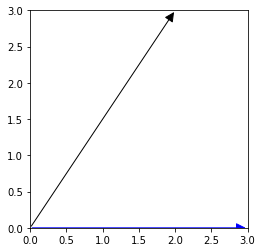

In [4]:
plot_vecs(u, v)
autoscale_arrows()

## Vector operations

  - Addition (denoted $\vec{u}+\vec{v}$)
  - Subtraction, the inverse of addition (denoted $\vec{u}-\vec{v}$)
  - Scaling (denoted $\alpha \vec{u}$)
  - Dot product (denoted $\vec{u} \cdot \vec{v}$)
  - Cross product (denoted $\vec{u} \times \vec{v}$)

### Vector addition

In [5]:
# algebraic
u+v

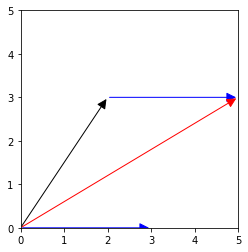

In [6]:
# graphical
plot_vecs(u, v)
plot_vec(v, at=u, color='b')
plot_vec(u+v, color='r')
autoscale_arrows()

### Basis

When we describe the vector as the coordinate pair $(4,6)$, we're implicitly using the *standard basis* $B_s = \{ \hat{\imath}, \hat{\jmath} \}$. The vector $\hat{\imath} \equiv (1,0)$ is a unit-length vector in the $x$-direciton,
and $\hat{\jmath} \equiv (0,1)$ is a unit-length vector in the $y$-direction.

To be more precise when referring to vectors, we can indicate the basis as a subscript of every cooridnate vector $\vec{v}=(4,6)_{B_s}$, which tells $\vec{v}= 4\hat{\imath}+6\hat{\jmath}=4(1,0) +6(0,1)$.

In [7]:
# the standard basis
ihat = Vector([1,0])
jhat = Vector([0,1])

v = 4*ihat + 6*jhat
v

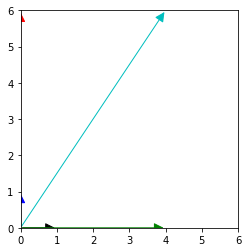

In [8]:
# geomtrically...
plot_vecs(ihat, jhat, 4*ihat, 6*jhat, v)
autoscale_arrows()

The same vector $\vec{v}$ will correspond to the a different pair of coefficients if a differebt basis is used.
For example, if we use the basis $B^\prime = \{ (1,1), (1,-1) \}$, the same vector $\vec{v}$ must be expressed as $\vec{v} = 5\vec{b}_1 +(-1)\vec{b}_2=(5,-1)_{B^\prime}$.

In [9]:
# another basis B' = { (1,1), (1,-1) }
b1 = Vector([ 1, 1])
b2 = Vector([ 1, -1])

v = 5*b1 + (-1)*b2
v

# How did I know 5 and -1 are the coefficients w.r.t basis {b1,b2}?
# Matrix([[1,1],[1,-1]]).inv()*Vector([4,6])

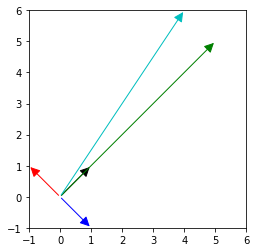

In [10]:
# geomtrically...
plot_vecs(b1, b2, 5*b1, -1*b2, v)
autoscale_arrows()

## Matrix operations

  - Addition (denoted $A+B$)
  - Subtraction, the inverse of addition (denoted $A-B$)
  - Scaling by a constant $\alpha$  (denoted $\alpha A$)
  - Matrix-vector product (denoted $A\vec{x}$, related to linear transformations)
  - Matrix product (denoted $AB$) 
  - Matrix inverse (denoted $A^{-1}$)
  - Trace (denoted $\textrm{Tr}(A)$)
  - Determinant (denoted $\textrm{det}(A)$ or $|A|$)

In linear algebra we'll extend the notion of funttion $f:\mathbb{R}\to \mathbb{R}$, to functions that act on vectors called *linear transformations*.  We can understand the properties of linear transformations $T$ in analogy with ordinary functions:

\begin{align*}
    \textrm{function } 
     f:\mathbb{R}\to \mathbb{R}
         & \ \Leftrightarrow \,
         \begin{array}{l}
    \textrm{linear transformation } 
    T:\mathbb{R}^{n}\! \to \mathbb{R}^{m}
    \end{array} \\
    \textrm{input }  x\in \mathbb{R} 	
         & \ \Leftrightarrow \  
        \textrm{input }  \vec{x} \in \mathbb{R}^n           \\
    \textrm{output } f(x) \in \mathbb{R}
         & \ \Leftrightarrow \
     \textrm{output }      T(\vec{x})\in \mathbb{R}^m \\
    g\circ\! f \: (x) =  g(f(x))
         & \ \Leftrightarrow \
    %      \textrm{matrix product } 
    S(T(\vec{x})) \\
    \textrm{function inverse } f^{-1}
         & \ \Leftrightarrow \ 
          \textrm{inverse transformation } T^{-1} \\
    \textrm{zeros of } f
         & \ \Leftrightarrow \
          \textrm{kernel of } T \\
    \textrm{image of } f
         & \ \Leftrightarrow \ 
             \begin{array}{l}
             \textrm{image of } T
              \end{array}
\end{align*}

## Linear property

$$
  T(a\mathbf{x}_1 + b\mathbf{x}_2) = aT(\mathbf{x}_1) + bT(\mathbf{x}_2)
$$

## Matrix-vector product representation of linear transformations

Equivalence between linear transformstions $T$ and matrices $M_T$:
    
$$
  T : \mathbb{R}^n \to \mathbb{R}^m
  \qquad
  \Leftrightarrow
  \qquad
  M_T \in \mathbb{R}^{m \times n}
$$

$$
  \vec{y} = T(\vec{x})
  \qquad
  \Leftrightarrow
  \qquad
  \vec{y} = M_T\vec{x}
$$

# 3/ Computational linear algebra

## Gauss-Jordan elimination procedure 

Suppose you're asked to solve for $x_1$ and $x_2$ in the following system of equations

\begin{align*}
1x_1 + 2x_2 &= 5 \\
3x_1 + 9x_2 &= 21.
\end{align*}


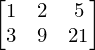

In [11]:
# represent as an augmented matrix
AUG = Matrix([
  [1, 2,   5],
  [3, 9,  21]])
AUG

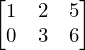

In [12]:
# eliminate x_1 in second equation by subtracting 3x times the first equation
AUG[1,:] = AUG[1,:] - 3*AUG[0,:]
AUG

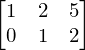

In [13]:
# simplify second equation by dividing by 3
AUG[1,:] = AUG[1,:]/3
AUG

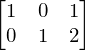

In [14]:
# eliminate x_2 from first equation by subtracting 2x times the second equation
AUG[0,:] = AUG[0,:] - 2*AUG[1,:]
AUG

This augmented matrix is in *reduced row echelon form* (RREF), and corresponds to the system of equations:

\begin{align*}
1x_1  \ \  \qquad &= 1 \\
       1x_2 &= 2,
\end{align*}

so the the solution is $x_1=1$ and $x_2=2$.

## Matrix equations

page 150

## Matrix product

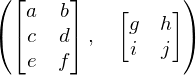

In [15]:
a,b,c,d,e,f, g,h,i,j = symbols('a b c d e f  g h i j')
A = Matrix([[a,b],
            [c,d],
            [e,f]])
B = Matrix([[g,h],
            [i,j]])

A, B

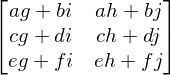

In [16]:
A*B

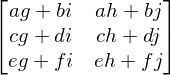

In [17]:
def mat_prod(A, B):
    """Compute the matrix product of matrices A and B."""
    assert A.cols == B.rows, "Error: matrix dimensions not compatible."
    m, ell = A.shape  # A is a  m x ell  matrix
    ell, n = B.shape  # B is a  ell x n  matrix
    C = zeros(m,n)
    for i in range(0,m):
        for j in range(0,n):
            C[i,j] = A[i,:].dot(B[:,j])
    return C

mat_prod(A,B)

In [18]:
# mat_prod(B,A)

## Determinant

In [19]:
a,b,c,d  = symbols('a b c d')
A = Matrix([[a,b],
            [c,d]])

A.det()

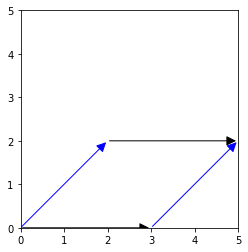

In [20]:
# Consider the parallelogram with sides:
u1 = Vector([3,0])
u2 = Vector([2,2])

plot_vecs(u1,u2)
plot_vec(u1, at=u2, color='k')
plot_vec(u2, at=u1, color='b')
autoscale_arrows()

# What is the area of this parallelogram?

In [21]:
# base = 3, height = 2, so area is 6

In [22]:
# Compute the area of the parallelogram with sides u1 and u2 using the deteminant
A = Matrix([[3,0],
            [2,2]])
A.det()

## Matrix inverse

For an invertible matrix $A$, the matrix inverse $A^{-1}$ acts to undo the effects of $A$:

$$
 A^{-1} A \vec{v} = \vec{v}.
$$

The effect applying $A$ followed by $A^{-1}$ (or the other way around) is the identity transformation:

$$
 A^{-1}A \ = \ \mathbb{1} \ = \ AA^{-1}.
$$

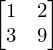

In [23]:
A = Matrix([[1, 2],
            [3, 9]])
A

In [24]:
# Compute deteminant to check if inverse matrix exists
A.det()
# if non-zero, then inverse exists

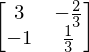

In [25]:
A.inv()

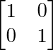

In [26]:
A.inv()*A

### Adjugate-matrix formula

The *adjugate matrix* of the matrix $A$ is obtained by replacing each entry of the matrix with a partial determinant calculation (called *minors*). The minor $M_{ij}$ is the determinant of $A$ with its $i$th row and $j$th columns removed.

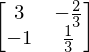

In [27]:
A.adjugate() / A.det()

### Augmented matrix approach

$$
 \left[ \, A \, | \,  \mathbb{1} \, \right]
 \qquad
 -\textrm{Gauss-Jordan elimination}\rightarrow
 \qquad
 \left[ \, \mathbb{1} \, | \,  A^{-1} \, \right]
$$

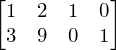

In [28]:
AUG = A.row_join(eye(2))
AUG

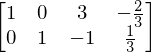

In [29]:
# performd row operations
AUG[1,:] = AUG[1,:] - 3*AUG[0,:]
AUG[1,:] = AUG[1,:]/3
AUG[0,:] = AUG[0,:] - 2*AUG[1,:]
AUG

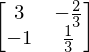

In [30]:
AUG[:,2:5]

### Using elementary matrices

Each row operation $\mathcal{R}_i$ can be represented as an elementary matrix $E_i$. The elementary matrix of a given row operation is obtained by performing the row operation on the identity matrix.

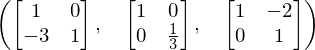

In [31]:
E1 = eye(2)
E1[1,:] = E1[1,:] - 3*E1[0,:]

E2 = eye(2)
E2[1,:] = E2[1,:]/3

E3 = eye(2)
E3[0,:] = E3[0,:] - 2*E3[1,:]

E1,E2,E3

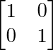

In [32]:
# the sequence of three row operations transforms the matrix A into RREF
E3*E2*E1*A

Recall definition $A^{-1}A=\mathbb{1}$, and we just observed that $E_3E_2E_1 A =\mathbb{1}$, so it must be that $A^{-1}=E_3E_2E_1$.

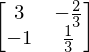

In [33]:
E3*E2*E1

# 4/ Geometrical linear algebra

Points, lines, and planes are geometrical objects that are conveniently expressed using the language of vectors.

## Points

A point $p=(p_x,p_y,p_z)$ refers to a single location in $\mathbb{R}^3$.

In [34]:
p = Point([2,4,5])
p

## Lines

A line is a one dimensional infinite subset of $\mathbb{R}^3$ that can be described as

$$
   \ell:  \{ p_o + \alpha \vec{v} \ | \ \forall \alpha \in \mathbb{R} \}.
$$

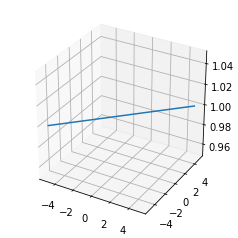

In [35]:
po = Point([1,1,1])
v = Vector([1,1,0])

plot_line(v, po)

## Planes

A plane is a two-dimensional infinite subset of $\mathbb{R}^3$ that can be described in one of three ways:

The *general equation*:

$$
  P: \left\{ \,  Ax+By+Cz=D \, \right\} 
$$

The *parametric equation*:

$$
  P: \{  p_{\textrm{o}}+s\,\vec{v} + t\,\vec{w}, \ \forall s,t \in \mathbb{R} \},
$$

which defines a plane that that contains the point $p_{\textrm{o}}$ and the vectors $\vec{v}$ and $\vec{w}$.

Or the *geometric equation*:

$$
  P: \left\{ \vec{n} \cdot [ (x,y,z) - p_{\textrm{o}} ] = 0 \,\right\},
$$

which defines a plane that contains point $p_{\textrm{o}}$ and has normal vector $\hat{n}$.
 

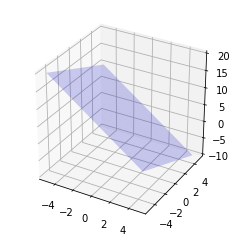

In [36]:
# plot plane     2x + y + z = 5
normal = Vector([2,   1,  1])
D = 5

plot_plane(normal, D)

## Projection operation

A projection of the vector $\vec{v}$ in the direction $\vec{d}$ is denoted $\Pi_{\vec{d}}(\vec{v})$. The formula for computing the projections uses the dot product operation:

$$
   \Pi_{\vec{d}}(\vec{v})  
      \ \equiv \ 
      (\vec{v} \cdot \hat{d}) \hat{d}
      \ =  \ 
      \left(\vec{v} \cdot \frac{\vec{d}}{\|\vec{d}\|} \right) \frac{\vec{d}}{\|\vec{d}\|}.
$$

In [37]:
def proj(v, d):
    """Computes the projection of vector `v` onto direction `d`."""
    return v.dot( d/d.norm() )*( d/d.norm() )

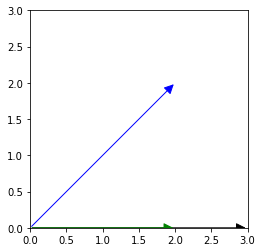

In [38]:
v = Vector([2,2])
d = Vector([3,0])
proj_v_on_d = proj(v,d)

plot_vecs(d, v, proj_v_on_d)
autoscale_arrows()

The basic projection operation can be used to compute projection onto planes, and compute distances between geomteirc objects (page 192).

## Bases and coordinate projections

page 194

  - Different types of bases
    - Orthonormal
    - Orthogonal
    - Generic
  - Change of basis operation

## Vector spaces

page 199

## Vector space techniques

page 211

# 5/ Linear transformations

page 223

## Vector functions

Functions that take vectors as inputs and produce vectors as outputs:

$$
  T:\mathbb{R}^{n}\! \to \mathbb{R}^{m}
$$

## Matrix representation of linear transformations

 
$$
  T : \mathbb{R}^n \to \mathbb{R}^m
  \qquad
  \Leftrightarrow
  \qquad
  M_T \in \mathbb{R}^{m \times n}
$$

## Input and output spaces

We can understand the properties of linear transformations $T$, and their matrix representations $M_T$ in analogy with ordinary functions:

\begin{align*}
    \textrm{function } 
     f:\mathbb{R}\to \mathbb{R}
         & \ \Leftrightarrow \,
         \begin{array}{l}
    \textrm{linear transformation } 
    T:\mathbb{R}^{n}\! \to \mathbb{R}^{m}		 \\
    \textrm{represented by the matrix } M_T \in \mathbb{R}^{m \times n}
    \end{array} \\
    %
    \textrm{input }  x\in \mathbb{R} 	
         & \ \Leftrightarrow \  
        \textrm{input }  \vec{x} \in \mathbb{R}^n           \\
    %\textrm{compute } 
    \textrm{output } f(x) \in \mathbb{R}
         & \ \Leftrightarrow \
    %      \textrm{compute matrix-vector product } 
     \textrm{output }      T(\vec{x}) \equiv M_T\vec{x} \in \mathbb{R}^m \\
    %\textrm{function composition  } 
    g\circ\! f \: (x) =  g(f(x))
         & \ \Leftrightarrow \
    %      \textrm{matrix product } 
    S(T(\vec{x})) \equiv M_SM_T \vec{x} \\
    \textrm{function inverse } f^{-1}
         & \ \Leftrightarrow \ 
          \textrm{matrix inverse } M_T^{-1} \\
    \textrm{zeros of } f
         & \ \Leftrightarrow \
          \textrm{kernel of } T  \equiv  \textrm{null space of } M_T \equiv \mathcal{N}(A)  \\
    \textrm{image of } f
         & \ \Leftrightarrow \ 
             \begin{array}{l}
             \textrm{image of } T \equiv  \textrm{column space of } M_T  \equiv \mathcal{C}(A) 
              \end{array}
\end{align*}

Observe we refer to the linear transformation $T$ and its matrix representation $M_T$ interchangeably.

## Finding matrix representations

page 234

## Invertible matrix theorem 

page 250

# 6/ Theoretical linear algebra

## Eigenvalues and eigenvectors

An eigenvector of the matirx $A$ is a special input vector, for which the matrix $A$ acts as a scaling:

$$
  A\vec{e}_\lambda = \lambda\vec{e}_\lambda,
$$

where $\lambda$ is called the *eigenvalue* and $\vec{e}_\lambda$ is the corresponding eigenvector.

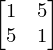

In [39]:
A = Matrix([[1, 5],
            [5, 1]])
A

In [40]:
A*Vector([1,0])

In [41]:
A*Vector([1,1])

The *characterisitic polynomial* of the matrix $A$ is defined as 

$$
  p(\lambda) \equiv \det(A-\lambda \mathbb{1}).
$$

In [42]:
l = symbols('lambda')
(A-l*eye(2)).det()

In [43]:
# the roots of the characteristic polynomial are the eigenvalues of A
solve( (A-l*eye(2)).det(), l)

In [44]:
# or call `eigenvals` method
A.eigenvals()

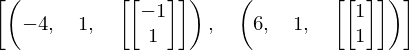

In [45]:
A.eigenvects()
# can also find eigenvects using (A-6*eye(2)).nullspace() and (A+4*eye(2)).nullspace()

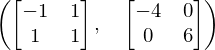

In [46]:
Q, Lambda = A.diagonalize()
Q, Lambda

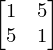

In [47]:
Q*Lambda*Q.inv()  # == eigendecomposition of A 

## Special types of matrices

page 271

## Abstract vectors paces

Generalize vector techniques to other vector like quantities. Allow us to talk about basis, dimention, etc.

page 277

## Abstract inner product spaces

Use geometrical notions like length and orthogonaloty for abstract vectors.

page 281

## Gram–Schmidt orthogonalization

page 288

## Matrix decompositions

page 292

## Linear algebra with complex numbers

page 298

# Applications

  - Chapter 7: General applications
  - Chapter 8: Probability theory
  - Chapter 9: Quantum mechanics

# Notation appendix

Check out page 499 for notation.